Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'spherical' Variogram Model
Partial Sill: 0.3785175499758058
Full Sill: 0.47270965719746744
Range: 48.91017595535537
Nugget: 0.09419210722166164 



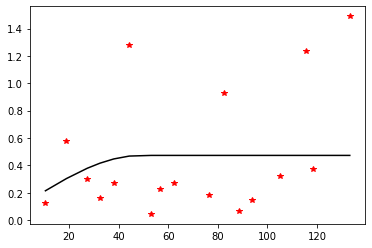

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



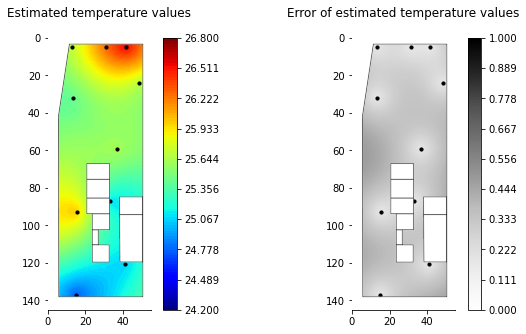

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'spherical' Variogram Model
Partial Sill: 0.3785175499758058
Full Sill: 0.47270965719746744
Range: 48.91017595535537
Nugget: 0.09419210722166164 



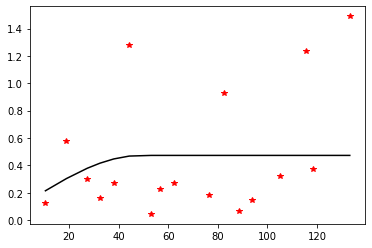

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



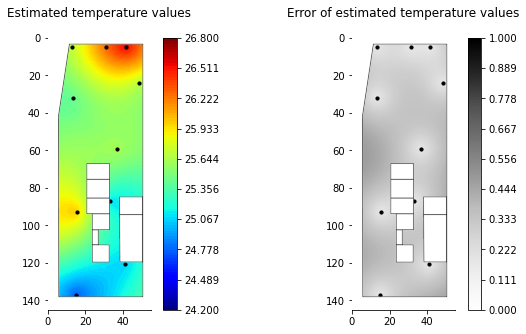

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'spherical' Variogram Model
Partial Sill: 0.3855946961281113
Full Sill: 0.4822087092210117
Range: 50.22327029500812
Nugget: 0.09661401309290042 



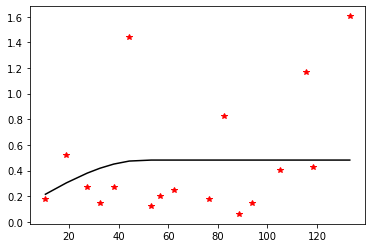

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



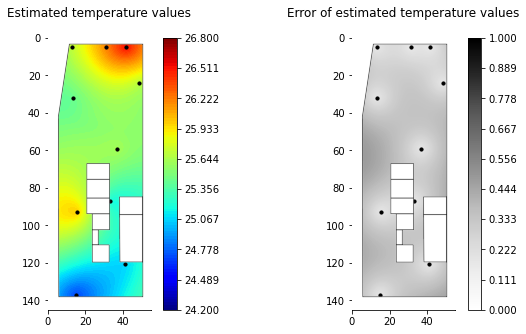

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'spherical' Variogram Model
Partial Sill: 0.39688713600841874
Full Sill: 0.49615157566493845
Range: 50.345449669333384
Nugget: 0.09926443965651971 



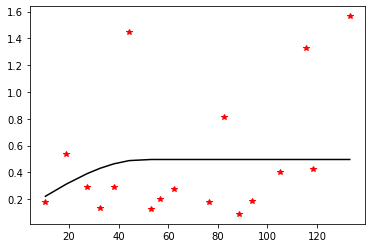

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



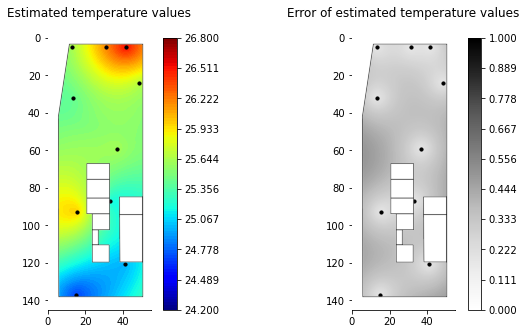

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'spherical' Variogram Model
Partial Sill: 0.3733293106502323
Full Sill: 0.49966545005234264
Range: 49.12901023720891
Nugget: 0.12633613940211033 



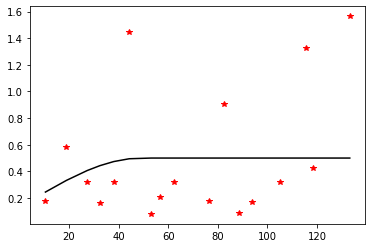

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



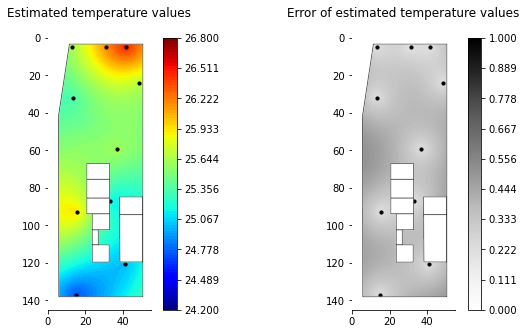

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'spherical' Variogram Model
Partial Sill: 0.36927191329536474
Full Sill: 0.5075626213670942
Range: 49.22724518101013
Nugget: 0.13829070807172944 



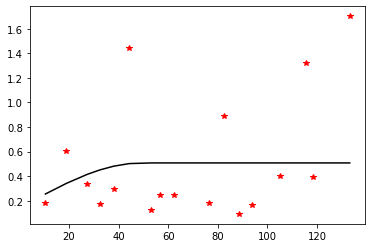

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



KeyboardInterrupt: 

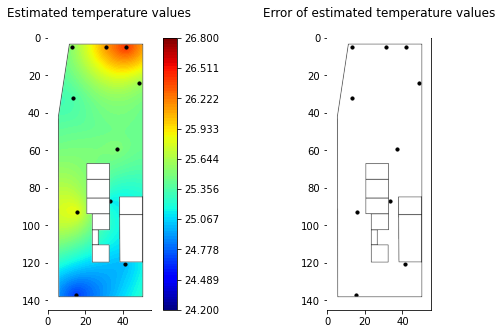

In [28]:
import numpy as np
import pandas as pd 
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import pykrige.kriging_tools as kt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#import floor plans
img = mpimg.imread("floor_plan.png") 
img2 = mpimg.imread("floor_plan2.png")
img3 = mpimg.imread("floor_plan3.png")

#read coordinates of sensors 
position=pd.read_csv('sensor_position.txt',delimiter="\t")
x=np.array(position['X']) 
y=np.array(position['Y']) 
sensor=np.array(position['Sensor'])

#read temperature and humidity data
temperature=pd.read_csv('data_temperature.txt',delimiter="\t",header = None)
data_temperature=np.array(temperature[:])

#create a grid in order to run the kriging in it
grid_space = 0.1
grid_x = np.arange(0, 55.1, grid_space)  
grid_y = np.arange(0, 145.1, grid_space)

#kriging estimation and plotting: estimate for each time
for i in range(len(data_temperature)):
    OK = OrdinaryKriging(x, y, data_temperature[i], variogram_model='spherical', verbose=True, enable_plotting=True,nlags=20)
    z_estim, e_estim = OK.execute('grid', grid_x, grid_y)
    
    xintrp, yintrp = np.meshgrid(grid_x, grid_y)
    
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    
    ax1.set_title('Estimated temperature values\n')
    ax1.scatter(x, y,s=10,c='black' ,zorder=2,marker='o',label='Sensor')
    ax1.imshow(img2, extent=[0, 55, 145, 0],zorder=3)
    contour1=ax1.contourf(xintrp, yintrp, z_estim, np.linspace(24.2, 26.8,100,endpoint=True) ,cmap='jet', zorder=1)
    cb1=plt.colorbar(contour1,ax=ax1,ticks=np.linspace(24.2, 26.8,10,endpoint=True))
 
    ax2.set_title('Error of estimated temperature values\n')
    ax2.scatter(x, y,s=10,c='black' ,zorder=2,marker='o',label='Sensor')
    ax2.imshow(img2, extent=[0, 55, 145, 0],zorder=3)
    contour2=ax2.contourf(xintrp, yintrp, e_estim , np.linspace(0, 1.0,400,endpoint=True) ,cmap='Greys', zorder=1) 
    cb2=plt.colorbar(contour2,ax=ax2,ticks=np.linspace(0, 1.0,10,endpoint=True))
    
    plt.show()
